# Introduction

## What is this dataset?
This dataset records gun violence happened in United States from 2013 to 2018.

## Where did you get it from?
[Gun Violence Archive](http://www.gunviolencearchive.org/)

## Why did you choose this particular data?
As an international student from a country that totally bans guns, I’m really interested in the gun violence in United States. I hope to learn the gun violence around United States and find a safe place to live after graduation.

## If you brought in a second dataset such as census data, do the same for this one. 

## What types of questions were you hoping to explore with this data?
I hope to find the most dangerous and the safest place in United States.

# Summary of Data

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import folium 
from folium import plugins

In [2]:
file_path = 'gun-violence-data_01-2013_03-2018.csv'
data = pd.read_csv(file_path)
data.head(3)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0


In [3]:
# Create some additional features
df = data
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['total_attack'] = df['n_killed'] + df['n_injured']

## Histogram

In [39]:
hist_data = [go.Histogram(x=df.total_attack)]
hist_layout = dict(xaxis = dict(title='Number of people involved'),
                   yaxis = dict(title='Count'),
                   title = 'Histogram of total attack (killed and injured) in USA between 2014 and 2017')
hist_fig = dict(data=hist_data, layout=hist_layout)
py.iplot(hist_fig)

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Barplot

In [11]:
states = data['state'].value_counts().head(15).to_frame().reset_index()

In [17]:
trace1 = go.Bar(x = states['index'],
                y = states.state)
bar_layout = dict(title='Number of incidents in different states between 2014 and 2017',
                  xaxis= dict(title='State'),
                  yaxis= dict(title='Number of Attack')
                 )
bar_data = [trace1]
bar_fig = dict(data=bar_data, layout=bar_layout)
py.iplot(bar_fig)

/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [19]:
cities = data["city_or_county"].value_counts().head(15).to_frame().reset_index()

In [20]:
trace2 = go.Bar(x = cities['index'],
                y = cities.city_or_county)
bar_layout = dict(title='Number of total attack in different cities between 2014 and 2017',
              xaxis= dict(title='City'),
              yaxis= dict(title='Number of Attack')
             )
bar_data = [trace2]
bar_fig = dict(data=bar_data, layout=bar_layout)
py.iplot(bar_fig)

/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Boxplot

In [18]:
year_2014 = go.Box(x=df[df.year==2014].total_attack, name="2014")
year_2015 = go.Box(x=df[df.year==2015].total_attack, name="2015")
year_2016 = go.Box(x=df[df.year==2016].total_attack, name="2016")
year_2017 = go.Box(x=df[df.year==2017].total_attack, name="2017")
box_data = [year_2014, year_2015, year_2016, year_2017]
box_layout = dict(title = 'Boxplot of total attack (killed and injured) number in USA between 2014 and 2017',
                  xaxis = dict(title= 'Number of total attack'))
box_fig = dict(data=box_data, layout=box_layout)
py.iplot(box_fig)

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:


## Scatterplot

In [30]:
count_2014 = df[df.year==2014]['month'].value_counts().to_frame().reset_index().sort_values(by='index')
count_2015 = df[df.year==2015]['month'].value_counts().to_frame().reset_index().sort_values(by='index')
count_2016 = df[df.year==2016]['month'].value_counts().to_frame().reset_index().sort_values(by='index')
count_2017 = df[df.year==2017]['month'].value_counts().to_frame().reset_index().sort_values(by='index')

In [64]:
# Creating trace1
trace1 = go.Scatter(x = count_2014['index'],
                    y = count_2014['month'],
                    mode = "lines+markers",
                    name = "2014")
trace2 = go.Scatter(x = count_2015['index'],
                    y = count_2015['month'],
                    mode = "lines+markers",
                    name = "2015")
trace3 = go.Scatter(x = count_2016['index'],
                    y = count_2016['month'],
                    mode = "lines+markers",
                    name = "2016")
trace4 = go.Scatter(x = count_2017['index'],
                    y = count_2017['month'],
                    mode = "lines+markers",
                    name = "2017")

scatter_data = [trace1, trace2, trace3, trace4]
scatter_layout = dict(title = 'Number of total attack in different month from 2014 to 2017',
                      xaxis= dict(title= 'Month', dtick=1),
                      yaxis= dict(title= 'Number of Attack',ticklen= 5,zeroline= False)
                      )

scatter_fig = dict(data=scatter_data, layout=scatter_layout)
py.iplot(scatter_fig)

/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



It turns out that February is the safest month of the whole year. (Maybe everyone stays home to watch Super Bowl)

In [66]:
# df[['date', 'state', 'city_or_county', 'n_killed', 'total_attack', 'n_injured', 'gun_type_parsed']].to_csv('modified.csv', index=False)

## Bubble Map

Plotted in Tableau

## Chloropleth Map

Plotted in Tableau

## Connection Map

Plotted in Tableau

## Heat map

In [67]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'year', 'month', 'monthday', 'weekday',
       'total_attack', 'gun_type_parsed'],
      dtype='object')

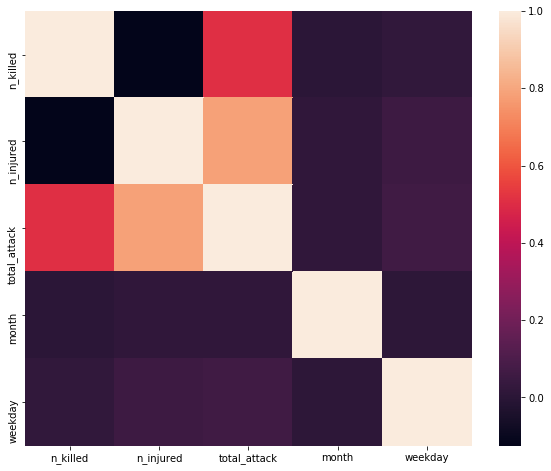

In [74]:
from pylab import rcParams

rcParams['figure.figsize'] = 10, 8
corr = df[['n_killed', 'n_injured', 'total_attack', 'month', 'weekday']].corr()

# plot the heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)

## Stacked area or stream graph

Plotted in Tableau

## Treemapping

In [44]:
gun=df
gun['gun_type_parsed'] = gun['gun_type'].fillna('0:Unknown')
gt = gun.groupby(by=['gun_type_parsed']).agg({'n_killed': 'sum', 'n_injured' : 'sum', 'state' : 'count'}).reset_index().rename(columns={'state':'count'})

results = {}
for i, each in gt.iterrows():
    wrds = each['gun_type_parsed'].split("||")
    for wrd in wrds:
        if "Unknown" in wrd:
            continue
        wrd = wrd.replace("::",":").replace("|1","")
        gtype = wrd.split(":")[1]
        if gtype not in results: 
            results[gtype] = {'killed' : 0, 'injured' : 0, 'used' : 0}
        results[gtype]['killed'] += each['n_killed']
        results[gtype]['injured'] +=  each['n_injured']
        results[gtype]['used'] +=  each['count']

gun_names = list(results.keys())
used = [each['used'] for each in list(results.values())]
killed = [each['killed'] for each in list(results.values())]
injured = [each['injured'] for each in list(results.values())]
danger = []
for i, x in enumerate(used):
    danger.append((killed[i] + injured[i]) / x)

In [46]:
guns = pd.DataFrame({'Gun name' : gun_names, 'Used': used})
guns.groupby('Gun name').sum().sort_values(by='Used', ascending=False).head(20)
guns.head()

,Gun name,Used
0,12 gauge,1114
1,20 gauge,207
2,22 LR,3355
3,25 Auto,612
4,32 Auto,490


In [50]:
guns.to_csv('guns.csv', index=False)

Plotted with Tableau

## An interactive plot (can be combined with any of the above)

In [4]:
smalldf = df[df['n_killed'] >= 3][['latitude', 'longitude', 'total_attack', 'n_killed']].dropna()
map1 = folium.Map(location=[39.50, -98.35], tiles='CartoDB dark_matter', zoom_start=3.5)
map2 = folium.Map([39.50, -98.35], zoom_start=3.5, tiles='cartodbdark_matter')
markers = []
for i, row in smalldf.iterrows():
    loss = row['total_attack']
    if row['total_attack'] > 100:
        loss = row['total_attack']*0.1    
    folium.CircleMarker([float(row['latitude']), float(row['longitude'])], radius=float(loss), color='#ef4f61', fill=True).add_to(map1)
map1